## Импорт библиотек

In [156]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import networkx as nx
import glob

In [157]:
directory = '../data/*.xls' 
files = glob.glob(directory)[0]
files

'../data\\socio.xls'

## Считываем всевозможные листы регулярным выражением

In [158]:
df = pd.read_excel(files,None)
sheetnames = list(df.keys())
for x in range(1,len(sheetnames)):
    exec('M%x = pd.read_excel(files, sheet_name = sheetnames[x])' % x)

In [159]:
description = pd.read_excel('../data/socio.xls', sheet_name='Description', skiprows=4, index_col=0) #описание исходных данных

In [160]:
description

,Вопрос
Лист,
M1,1.С кем бы Вы хотели сидеть за одной партой?
M2,2.С кем бы Вы НЕ хотели сидеть за одной партой?
M3,3.Кого бы Вы хотели пригласить на свой День Ро...
M4,4.Кого бы Вы НЕ хотели пригласить на свой День...
M5,5.Кого бы Вы назначили старостой группы?
M6,6.Кого бы Вы НЕ назначили старостой группы?
M7,7.С кем из своих одногруппников Вы бы хотели п...
M8,8.С кем из своих одногруппников Вы бы НЕ хотел...
M9,9.Кого из одногруппников Вы считаете своим дру...


In [161]:
def matrix_unite(data_1, data_2):
    '''Объединяет две социоматрицы с положительными
    и отрицательными признаками под одному вопросу, например, 
    матрицы 
    
    С кем бы Вы хотели сидеть за одной партой?
    С кем бы Вы НЕ хотели сидеть за одной партой?
    
    и считает число отданных и полученных выборов
    '''
    data = data_1 - data_2
    data['+'] = data_1.sum(axis=1)
    data['-'] = data_2.sum(axis=1)
    data['out'] = data['+'] + data['-'] #надо как-то убрать повторные пересчёты
    data.loc['+'] = data_1.sum(axis=0)
    data.loc['-'] = data_2.sum(axis=0)
    data.loc['in'] = data.loc['+'] + data.loc['-']
    data.loc['+', '+'] = data_1.sum(axis=1).sum()
    data.loc['-', '-'] = data_2.sum(axis=1).sum()
    data.loc['in', 'out'] = (data.loc['in']).sum()
    data = data.fillna(0)
    return data


In [162]:
question_1 = matrix_unite(M1, M2)
question_2 = matrix_unite(M3, M4)
question_3 = matrix_unite(M5, M6)
question_4 = matrix_unite(M7, M8)

In [163]:
question_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,+,-,out
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,-2.0,1.0,3.0,4.0
2,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,3.0,3.0
3,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,3.0,3.0
4,-1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,6.0,7.0
5,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,3.0
6,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,3.0
8,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
9,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0


In [212]:
def visualisation(table,name):
    cmap  = plt.cm.cividis
    plt.figure(figsize=(15, 10))
    plt.title(description.loc[name][0])
    G = nx.DiGraph(np.array(table))
    values =list(table.sum(axis=0)[0:14].to_dict().values())
    #nx.draw_networkx_labels(G,pos=nx.shell_layout(G),labels = dictir)
    nc = nx.draw(G, pos=nx.shell_layout(G), with_labels=True, \
             node_color= values, node_size=1000, cmap=cmap,\
            vmin = min(values),vmax = max(values))

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = min(values), vmax=max(values)))
    sm._A = []
    plt.colorbar(sm)
    
    plt.show() 

## 1.С кем бы Вы хотели сидеть за одной партой?

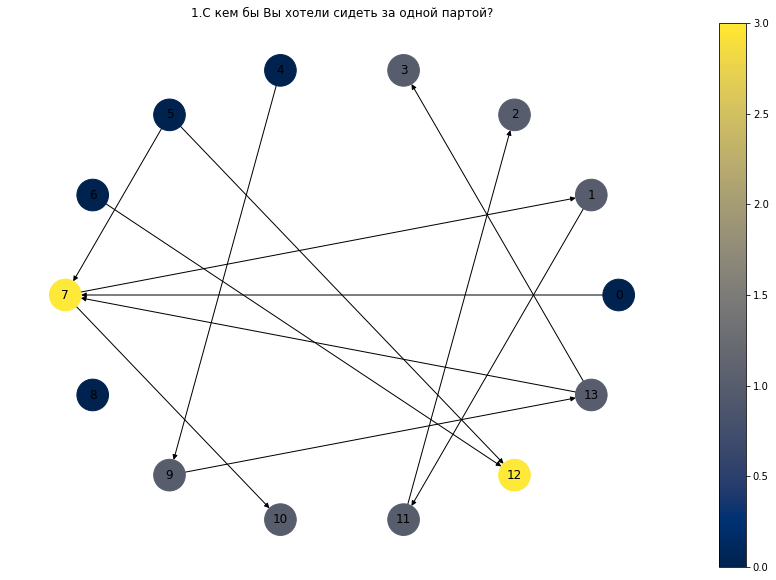

In [178]:
visualisation(M1,'M1')

## 2.С кем бы НЕ Вы хотели сидеть за одной партой?

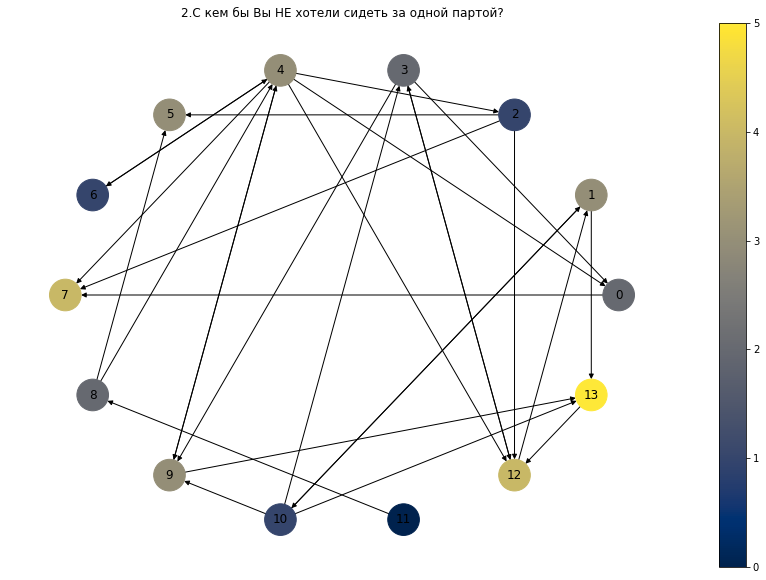

In [179]:
visualisation(M2,'M2')

## 3.Кого бы Вы хотели пригласить на свой День Рождения

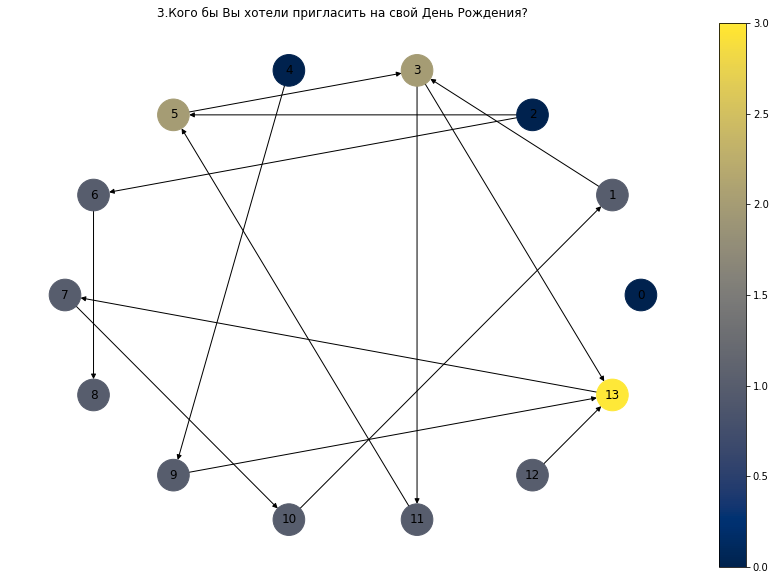

In [180]:
visualisation(M3,'M3')

# 4.Кого бы Вы НЕ хотели пригласить на свой День Рождения?

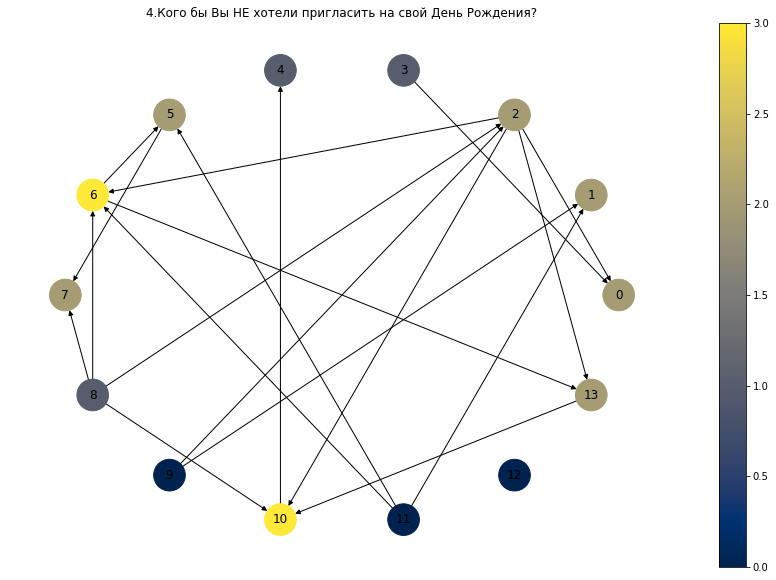

In [181]:
visualisation(M4,'M4')

# 5.Кого бы Вы назначили старостой группы?

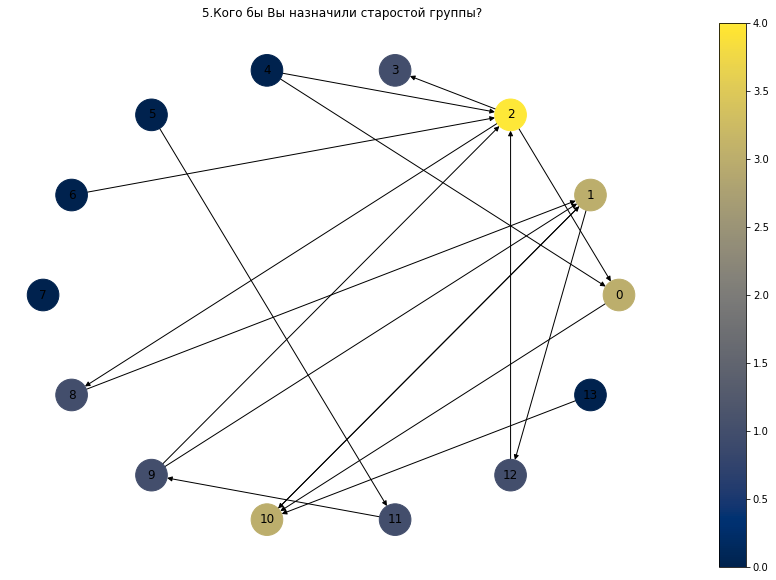

In [182]:
visualisation(M5,'M5')

# 6.Кого бы Вы НЕ назначили старостой группы?

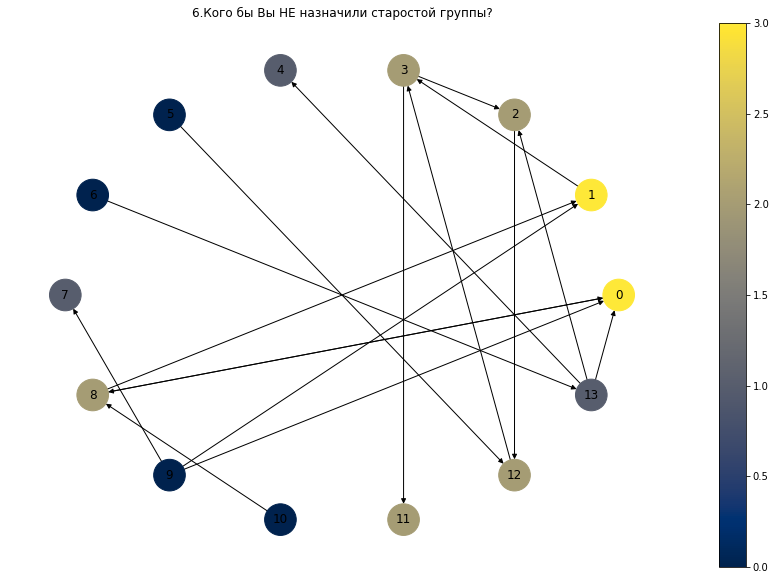

In [183]:
visualisation(M6,'M6')

# 7.С кем из своих одногруппников Вы бы хотели принять участие в реализации сложного проекта?

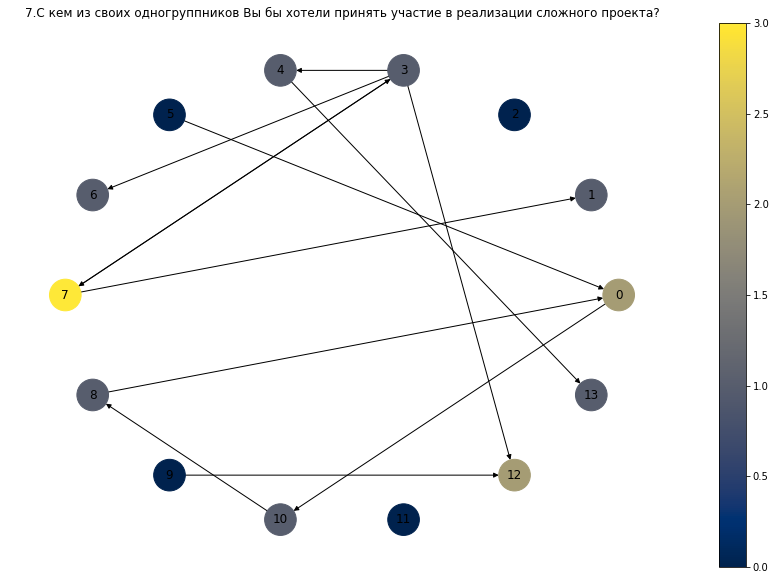

In [184]:
visualisation(M7,'M7')

# 8.С кем из своих одногруппников Вы бы НЕ хотели принять участие в реализации сложного проекта?

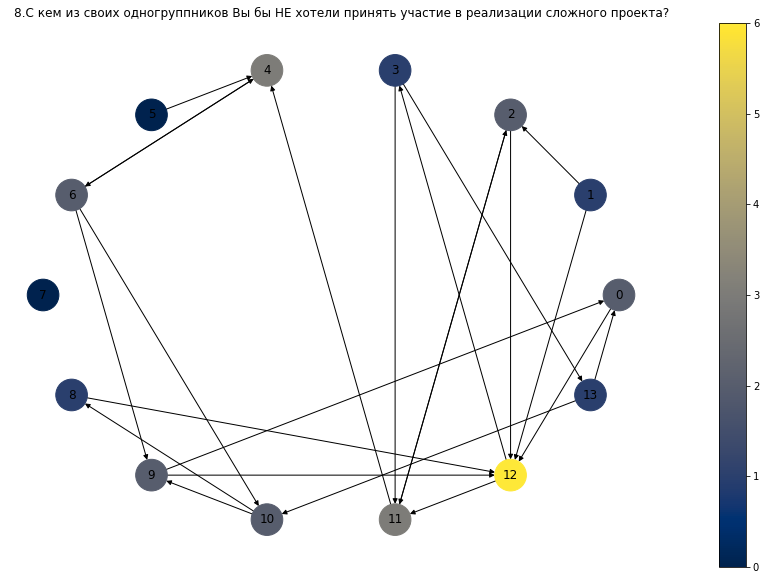

In [185]:
visualisation(M8,'M8')

# 9. Кого вы считаете своим другом

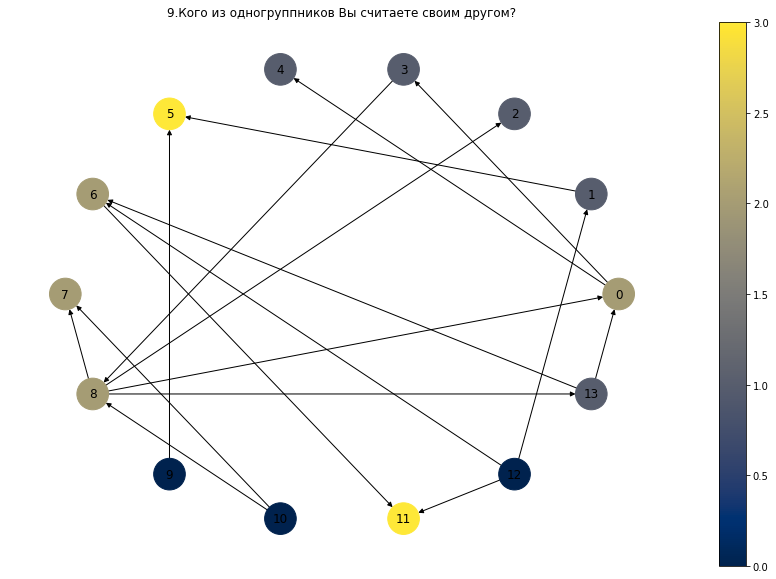

In [186]:
visualisation(M9,'M9')